<a href="https://colab.research.google.com/github/Rik8927/almabetter-capstone-project/blob/main/Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data includes airline reviews from 2006 to 2019 for popular airlines around the world withmultiple choice and free text questions. Data is scraped in Spring 2019. The main objectiveis to predict whether passengers will refer the airline to their friends.**
# Feature descriptions briefly as follows:

airline: Name of the airline.

overall: Overall point is given to the trip between 1 to 10.

author: Author of the trip

review date: Date of the Review

customer review:Review of the customers in free text format

aircraft: Type of the aircraft

traveller type: Type of traveler (e.g. business, leisure)

cabin: Cabin at the flight date flown: Flight date

seat comfort: Rated between 1-5

cabin service: Rated between 1-5

foodbev: Rated between 1-5

entertainment: Rated between 1-5

ground service: Rated between 1-5

value for money: Rated between 1-5

recommended: Binary, target variable.

**Objective**
The main objective is to predict whether passengers will refer the airline to their family or friends.








# **Loading Dataset and Importing Modules**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB



In [ ]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score


In [ ]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset from drive
airline_df = pd.read_excel('/content/data_airline_reviews (3).xlsx')

In [ ]:
#Top five rows of data
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Last five rows of data
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
#Total number of rows and columns
airline_df.shape

(131895, 17)

In [ ]:
#Column of the dataset
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
#Information
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
#checking the unique value of the recommended column
airline_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
#check the unique value
airline_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [ ]:
#counting the number of duplicate values
airline_df.duplicated().sum()

70711

In [ ]:
#Eliminate the null values
airline_df.drop_duplicates(inplace=True)

In [ ]:
airline_df.duplicated().sum()

0

Null values
From the last 5 rows, we can conclude that the dataset contain null values.check the null value of each column.

In [ ]:
#Checking the null value in each column
airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [ ]:
#overall description of the data by using transpose
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### **Exploratory data analysis**

##Which traveller type has more ratings?








<Axes: xlabel='traveller_type', ylabel='count'>

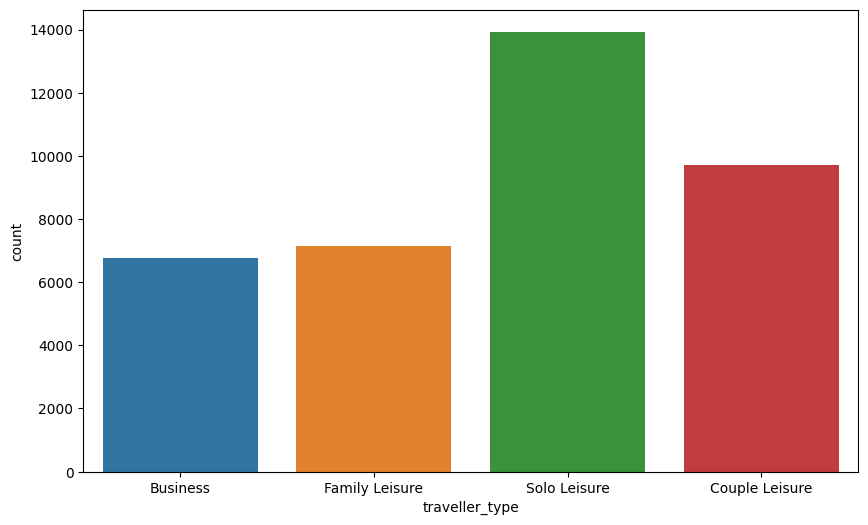

In [ ]:
#setting the figure size and plotting the graph
plt.figure(figsize=(10,6))
sns.countplot(x=airline_df ['traveller_type'])

## **Is it solo leisure worth for money?**

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

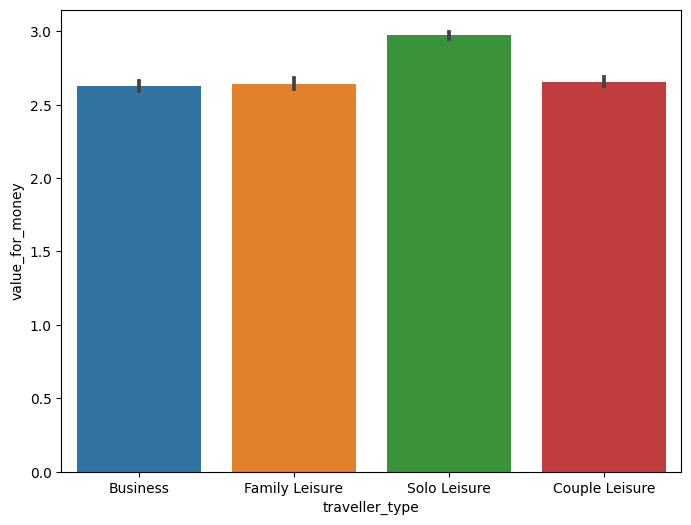

In [ ]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'])

## **In economy class what is the average rating of Food_bev and entertrainment given by passenger**

In [ ]:
#performing the group by method
eda_4=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
print(eda_4)


             cabin  food_bev  entertainment
0   Business Class  3.525108       3.356407
1    Economy Class  2.776919       2.758083
2      First Class  3.384295       3.280827
3  Premium Economy  2.919603       3.038980


<Axes: xlabel='cabin'>

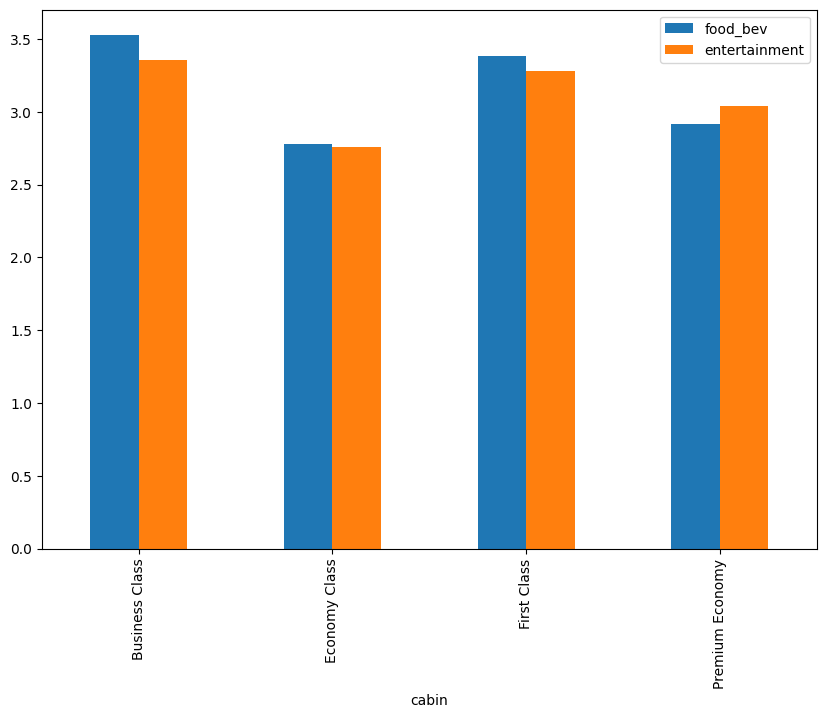

In [ ]:
plt.rcParams['figure.figsize']=(10,7)
eda_4.plot(x='cabin',y=["food_bev","entertainment"],kind="bar")


# Economy class has lowest rating regarding food_bev and entertainment.

## **Which cabin type has more service ratings?**

<Axes: xlabel='cabin', ylabel='cabin_service'>

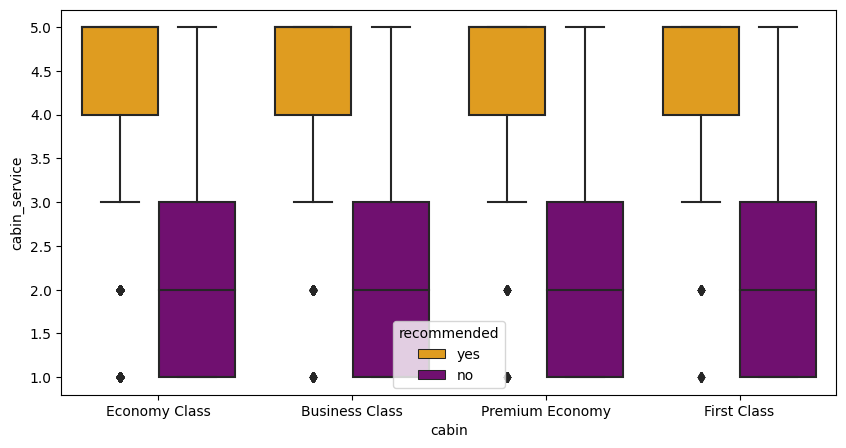

In [ ]:
#cabin type and cabin service ratings
plt.figure(figsize=(10,5))
sns.boxplot(x=airline_df.cabin, y=airline_df.cabin_service, hue = airline_df['recommended'], palette= ['orange','purple'])

1.First class traveller are least likely to recommend the airlines.
2.Recommendation is most probable when tn service is given full star rating i.e 5 out of 5 rating.
3.In economy class if we get rating between 4 to 5 that mean it will recommend.

# **Which traveller type has overall service ratings?**

<Axes: xlabel='traveller_type', ylabel='overall'>

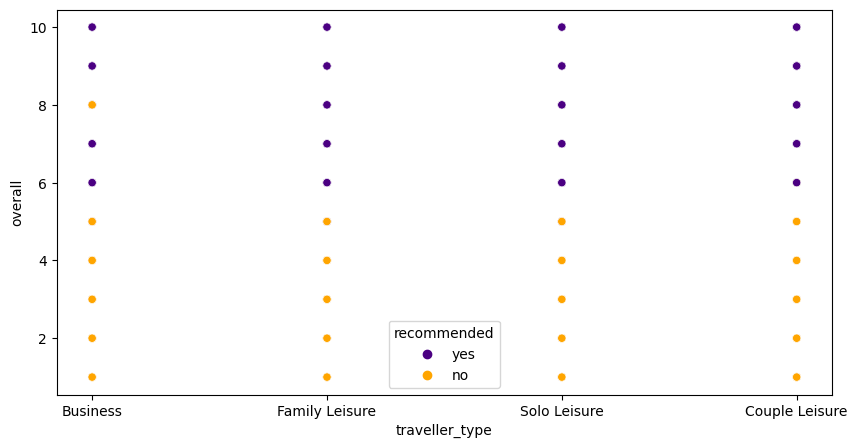

In [ ]:
#Traveller type and overall service ratings (out of 10 )
plt.figure(figsize=(10,5))
sns.scatterplot(x=airline_df.traveller_type, y=airline_df.overall, hue = airline_df['recommended'], palette= ['indigo','orange'])

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

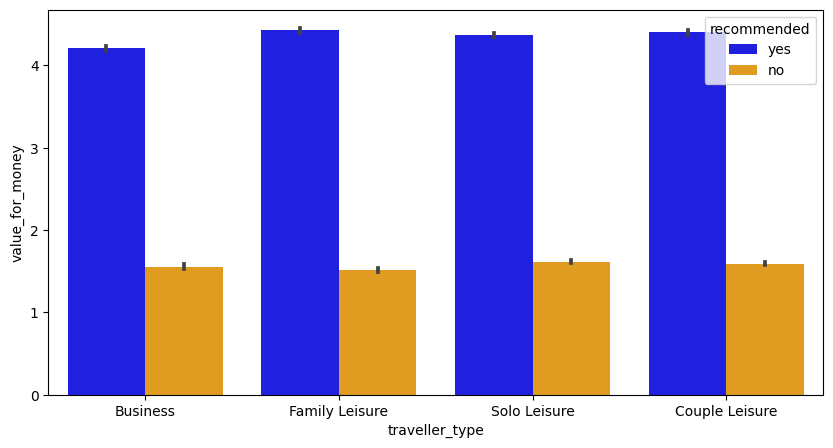

In [ ]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.barplot(x=airline_df.traveller_type, y=airline_df.value_for_money, hue = airline_df['recommended'], palette= ['blue','orange'])

When the cabin service is rated 5 ,It is highly likely that the reviewer has recommended the airlines to travel irrespective of the tpe of cabin.
Economy class is the most recommended cabin type,whereas Business class is the least one.

In [ ]:
# Get the number of trips each airline make.
trip_by_airlines = airline_df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

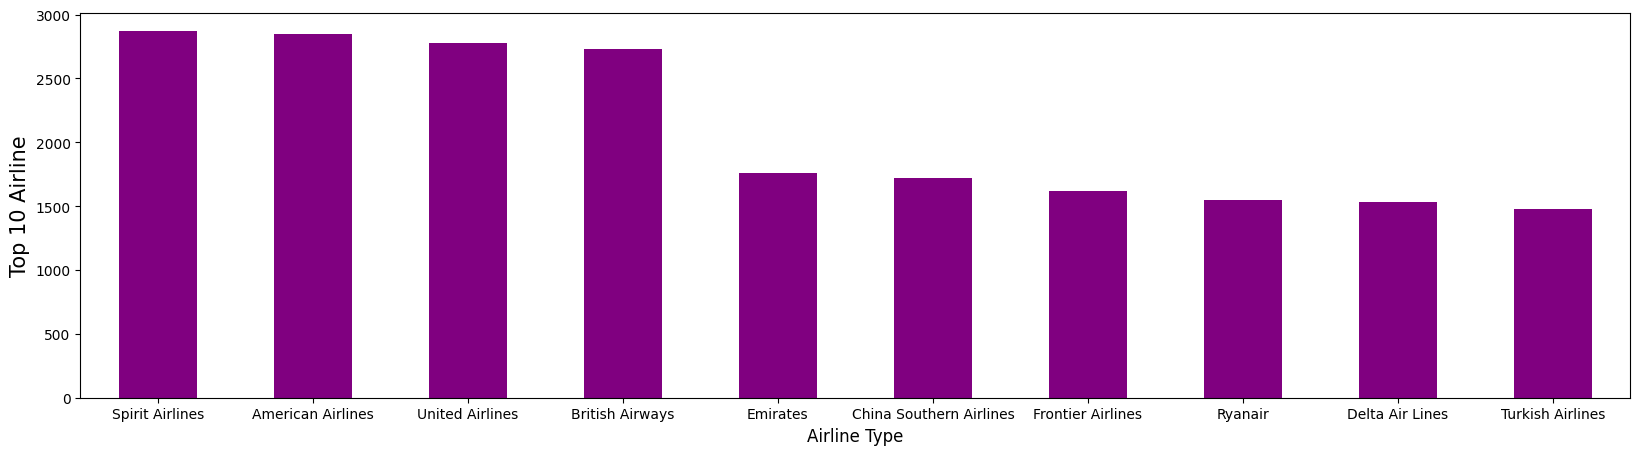

In [ ]:
#Top 10 airlines with most speed
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color='purple')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Top 10 Airline',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

So the top 10 airlines with most trip are:


1. Spirit Airlines
2. American Airlines
3.United Airlines
4.Bristish Airways
5.Emirates
6.China south Airlines
7.Frontier Airlines
8.Ryanair
9.Delta Airlines
10.Turkish Airlines









## **Comparison all independent features:**

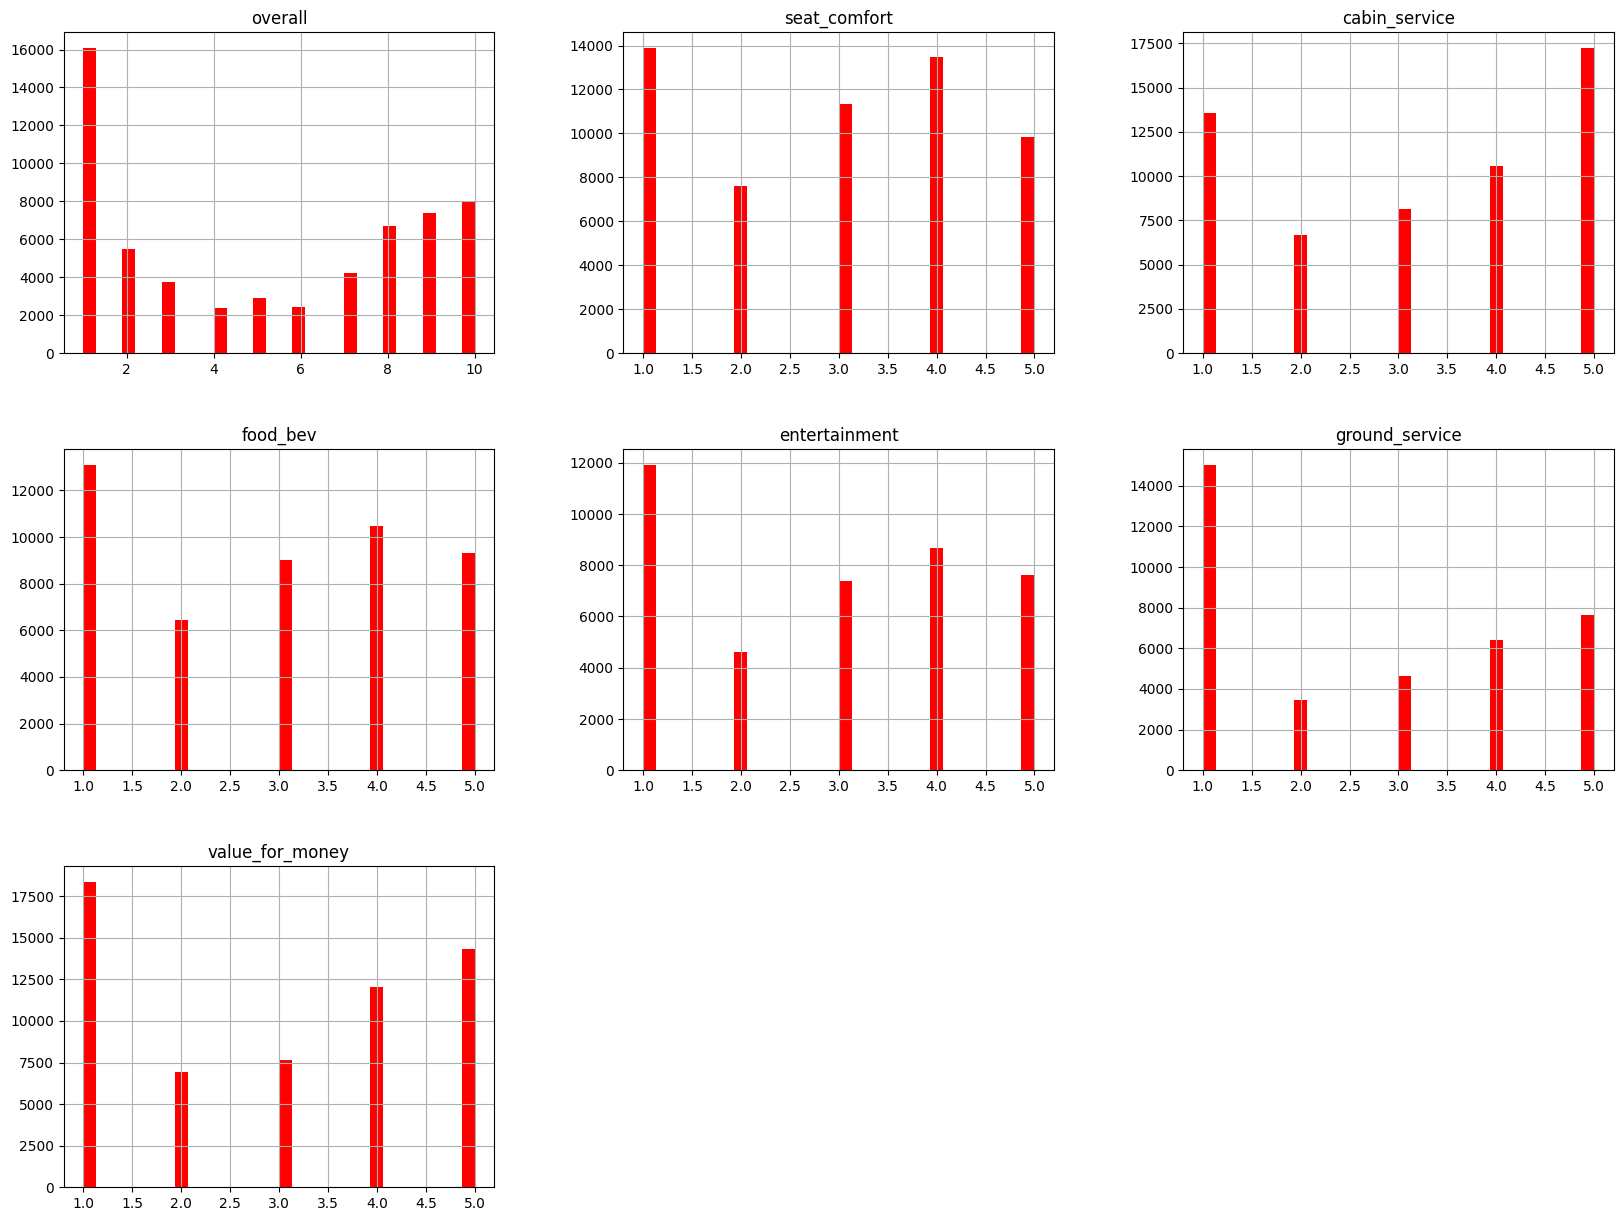

In [ ]:
#Frequency distribution using histogram
airline_df.hist(bins=30,figsize=(20,15),color='red')
plt.show()

So, from the above plot we can conclude that:
1.Overall:1 is the highest rating and 10 is the second best rating.
2.Seat Comfort:Rating 1 is highest and rationg 4 is the second highest.
3.Cabin service:5 is the highest rating and 1 is th second highest rating.
4.Food Beverage: 1 is the highest rating and 4 is the second highest rating.
5.Entertrainment: 1 is the highest rating and 4 is the second highest rating.
6.Ground Service: 1 is the highest rating and 5 is the second highest rating
7.Value for money: 1 is the highest rating and 5 is the second highest rating.






## **Dropping Unnecessary Collumn**

In [ ]:
#Checking percentage wise missing values
def missing_values_per_check(df):
  percent_missing=airline_df.isnull().sum() * 100/len(airline_df)
  missing_values_df=pd.DataFrame({'column_name':airline_df.columns,
                                  'percent_missing':percent_missing})
  return missing_values_df.sort_values('percent_missing',ascending=False)

In [ ]:
#Check percentage wise missing values
missing_values_per_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [ ]:
#Showing the unique aircraft name
airline_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [ ]:
#Number of unique aircrafts
airline_df.aircraft.nunique()


2088

In [ ]:
airline_df=airline_df.drop(['aircraft'],axis=1)


In [ ]:
#Dropping the column from data which are not for Use
airline_df = airline_df.drop(['author','review_date','route','date_flown','customer_review'],axis=1)
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


Reason for dropping columns:
Author - Being the categorical with high Variability not required for prediction.
Route - Not needed for building a model as it is independent of the Services and Quality of travel.
Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.
Review_date - Similar to Date_flown
Customer_review - As it is related to overall review feature of the datasets.
On the basis of null value percentage we divide our data in two parts-

high_null = columns which have high percentage of null values.
low_null = columns which have low percentage of null values.

In [ ]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [ ]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)


In [ ]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_df,col)

In [ ]:
#Imputaion technique using median imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [ ]:
#Coping the null value column
for col in high_null:
  median_imputation(airline_df,col)

Imputed null values by Median imputation for the columns have high percentage.

In [ ]:
#After imputed null values
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


In [ ]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [ ]:
airline_df['traveller_type'].fillna(method='ffill',inplace=True)

In [ ]:
airline_df['traveller_type'].fillna(method='ffill',inplace=True)


In [ ]:
airline_df['traveller_type'].fillna(method='ffill',inplace=True)


In [ ]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

In [ ]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [ ]:
#checking the new null value percentage
missing_values_per_check(airline_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [ ]:
airline_df.shape

(59761, 11)

It is better to clean the data and work on it.

Converting target as categorical data into numerical data:
'Label Encoding'

In [ ]:
#Converting target column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
airline_df.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0


<Axes: >

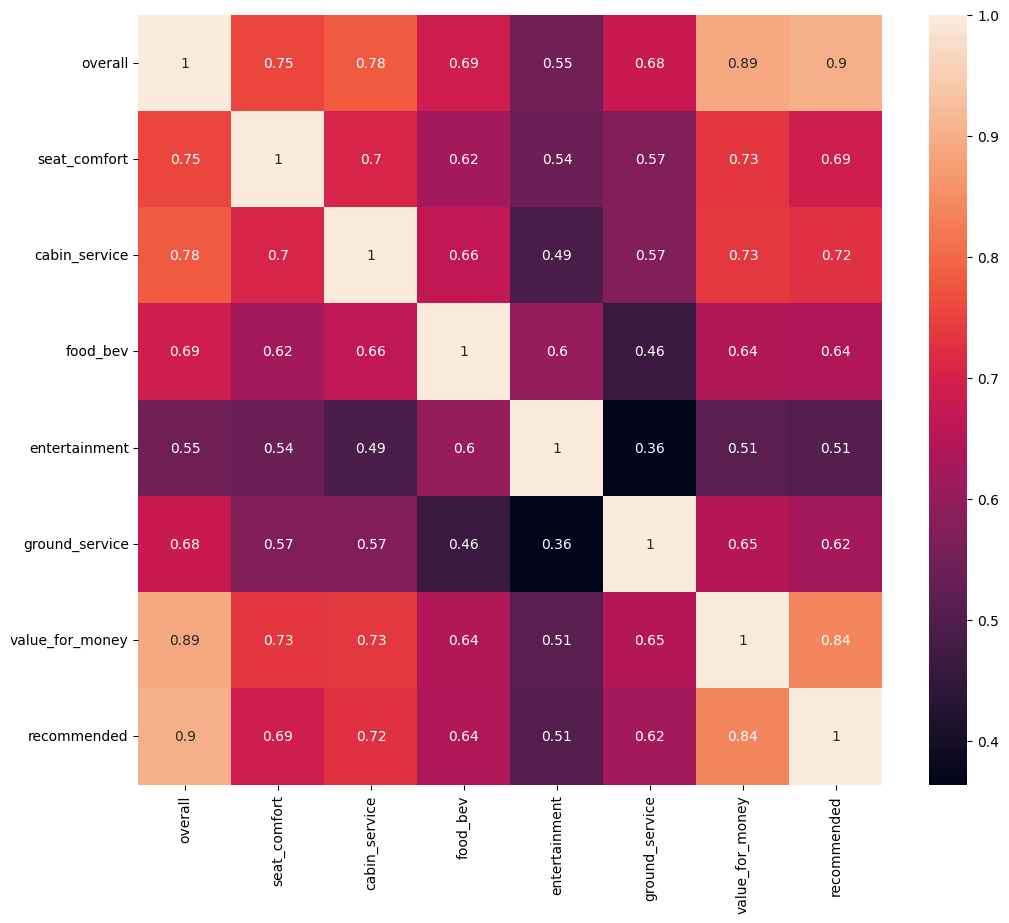

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(),annot=True)

**correlation plot**
Drop overall column as it has highest correlation value than others.

**Removing Multicolinearity Features**

In [ ]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)


In [ ]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [ ]:
#Drop overall column
airline_df.drop(["overall"], axis=1, inplace=True)
airline_df.drop(["airline"], axis=1, inplace=True)

## **Defining the dependent and independent variables**

In [ ]:
#Seperating the dependent and the independent column
y=airline_df['recommended']
x=airline_df.drop(columns='recommended')

In [ ]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

# **One hot encoding**

In [ ]:
x=pd.get_dummies(x)

In [ ]:
x.shape

(59761, 14)

In [ ]:
x.head(2)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0


In [ ]:
print("The percentage of no.labels  of target varibale is",np.round(y.value_counts()[0]/len(y)*100))
print("The percentage of no.labels of target variable is", np.round(y.value_counts()[1]/len(y)*100))

The percentage of no.labels  of target varibale is 52.0
The percentage of no.labels of target variable is 48.0


The percentage of both labels('yes','no') is approximately equal.So no need of Handling Class Imbalance Technique.

In [ ]:
#Train and Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [ ]:
#Shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


## **Fitting Logistic Regression**

In [ ]:
#Logistic regression fitting
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.coef_

array([[ 0.29470524,  0.54964494,  0.43522642,  0.24880929,  0.72092498,
         1.63381309,  0.15000711, -0.04985052, -0.15934752,  0.06655806,
         0.14922398, -0.06516326,  0.11367346, -0.19036704]])

In [ ]:
log_reg.intercept_

array([-11.84300155])

In [ ]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [ ]:
y_pred=log_reg.predict(x_test)

In [ ]:
#Report of logistic regresiion
report_IR=classification_report(y_test,y_pred)
print(report_IR)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



93 percent accuracy with logistic regression

<Axes: >

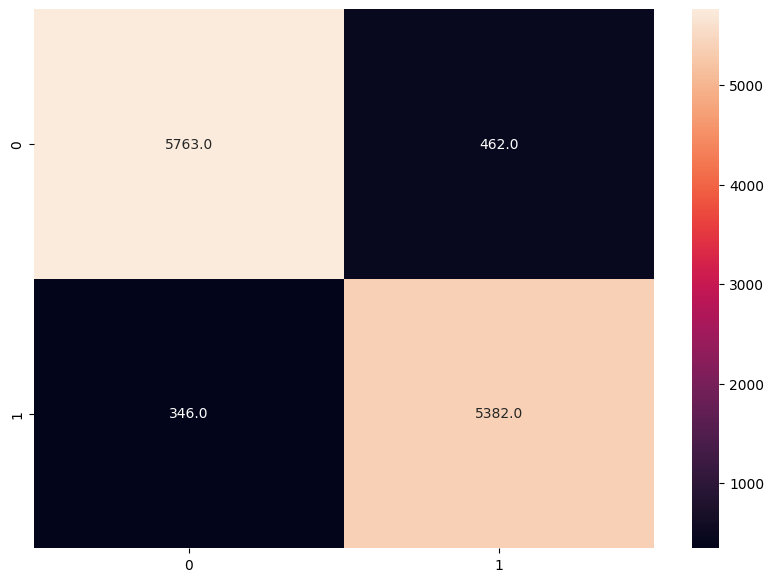

In [ ]:
#Confusion matrix of logistic regression
confuse_matrix_lr=confusion_matrix(y_test,y_pred)
#Ploting confusion matrix
sns.heatmap(confuse_matrix_lr,annot=True,fmt=".1f")

## **Implementing cross validate logistic regression**

In [ ]:
logistic=LogisticRegression()


In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
scores=cross_val_score(log_reg,x_train,y_train,cv=10)
print('Cross-validation Accuracy Scores',scores)

Cross-validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [ ]:
scores=pd.Series(scores)
scores.min(),scores.mean(),scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

## **Model-2:Fitting Decission Tree Classifier**

In [ ]:
#Initializing decission tree model object
tree_classify=DecisionTreeClassifier()
#Training a model with x and y
tree_classify.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
print("Training accuracy of decission tree model is",tree_classify.score(x_train,y_train))
print("Testing accuracy of decision tree model is",tree_classify.score(x_test,y_test))

Training accuracy of decission tree model is 0.9745440093708166
Testing accuracy of decision tree model is 0.9166736384171338


In [ ]:
y_pred=tree_classify.predict(x_test)

In [ ]:
#Report of decision tree
report_dec_tree=classification_report(y_test,y_pred)
print(report_dec_tree)


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



Here our model is overfitted.so Hyperparameter need to done make a decission tree model.

# **Hyperparameter Tuning For Decission Tree**

In [ ]:
#Setting the parameter and scoring matrix
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [ ]:
#Performing hyperparameter tuning using gridsearchcv

#Setting an estimator and crossvalidation
tree_cv=GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5, refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decission tree classifier
tree_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [ ]:
#Calling on best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [ ]:
#Calling on best score
tree_cv.best_score_

0.9371652656843548

93% accuracy of decission tree by hyperparamter tuning.

## **Model 3:Fitting Random Forest**

In [ ]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
random_forest.score(x_test,y_test)

0.928971806241111

In [ ]:
#Report of decission tree
report_ran_forest=classification_report(y_test,y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



# **Implementing cross-validate random forest**

In [ ]:
random_forest_gridcv=GridSearchCV(estimator=random_forest,param_grid=parameters,cv=5,verbose=2)

In [ ]:
random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [ ]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

# **Model 4:K-Nearest Neighbour**

In [ ]:
k_neighbour=KNeighborsClassifier()
k_neighbour.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=k_neighbour.predict(x_test)

In [ ]:
#Compute accuracy on the training set
train_accuracy=k_neighbour.score(x_train,y_train)
print(train_accuracy)
#Compute accuracy on the test set
test_accuracy=k_neighbour.score(x_test,y_test)
print(test_accuracy)

0.9493390227576974
0.9293901112691375


92 percent accuracy with k-nearest neighbour.

In [ ]:
coonfuse_matrix_k_neighbour=confusion_matrix(y_test,y_pred)
coonfuse_matrix_k_neighbour

array([[5815,  410],
       [ 434, 5294]])

In [ ]:
#area under ROC curve
roc_auc_score(y_test,y_pred)

0.9291841948800791

# **Model 5: Suport Vector Machine**

In [ ]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#score for support vector machine
support_vector.score(x_test, y_test)

0.9318162804316907

93% accuracy with support vector Machine

In [ ]:
y_pred = support_vector.predict(x_test)


In [ ]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[5747,  478],
       [ 337, 5391]])

## **Model 6:Naive base Clasifier**

In [ ]:
#Implementing naive bayes model
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [ ]:
naive_bayes.score(x_train,y_train)

0.9177543507362784

91 percent accuracy with naive bayes classifier.

In [ ]:
#Making prediction on the testing net
y_pred=naive_bayes.predict(x_test)

In [ ]:
#Comparing actual response values(y_test) with predicted response valuyes(y_pred)
from sklearn import metrics
print("Gaussian naive bayes model accuracy(in %):",metrics.accuracy_score(y_test,y_pred)*100)

Gaussian naive bayes model accuracy(in %): 91.0901029030369


# **Accuracy Metric for all fitted model**

In [ ]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [ ]:
models=[log_reg,tree_cv,random_forest,k_neighbour,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbour','support vector','naive bayes']

In [ ]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938985    0.932402
1  Precsion_Score     0.928165    0.920945
2    Recall_Score     0.945003    0.939595
3   Roc_Auc_Score     0.939259    0.932689

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.940972    0.932904
1  Precsion_Score     0.934318    0.926272
2    Recall_Score     0.942280    0.934358
3   Roc_Auc_Score     0.941032    0.932962

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.928972
1  Precsion_Score     0.970398    0.925222
2    Recall_Score     0.976323    0.926676
3   Roc_Auc_Score     0.974625    0.928880

-*-*--*-*--*-*-k_neighbour-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.949339 

# **Conclusion**
The Models used for this Classsification problem are

1.Logistic Regression Model
2.Decision Tree Model
3.Random Forest Model
4.K-Nearest Neighbor Model
5.Support Vector Machine Model
6.Naive Bayes

We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given first priority , Accuray is given second priority , and ROC AUC is given third priority.

We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.* We can conclude that LogisticRegression gives the best model.

model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.